In [3]:
import re
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import gensim

from gensim import corpora
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk import word_tokenize, bigrams
from collections import Counter


In [5]:
df = pd.read_csv('final_hdb_details.csv')

# Text Pre-Processing

In [7]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text) 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

df['amenities_processed'] = df['amenities'].apply(preprocess_text)
df['description_processed'] = df['description'].apply(preprocess_text)

df[['amenities', 'amenities_processed', 'description', 'description_processed']].head()

amenities  \
0                       Aircon Corner unit Renovated   
1  Corner unit Aircon Fridge Tv Bomb shelter Clos...   
2  Corner unit Washer Sofa Renovated Aircon Bomb ...   
3                                       Bomb shelter   
4                Bomb shelter Utility room Renovated   

                                 amenities_processed  \
0                       aircon corner unit renovated   
1  corner unit aircon fridge tv bomb shelter clos...   
2  corner unit washer sofa renovated aircon bomb ...   
3                                       bomb shelter   
4                bomb shelter utility room renovated   

                                         description  \
0  Unit above shop.\n\nNewly refurbished unit. Un...   
1  Premium Sembawang 5room with Balcony whole uni...   
2  (3+1) – Blk 193 Edgefield Plains @ Punggol – N...   
3  Telok Blangah MRT\n\nWHOLE UNIT FOR RENT\n\nNe...   
4  Beautiful HDB 4a for rent at jurong west\n\n**...   

                               description_processed  
0  unit above shop newly refurbished unit unit av...  
1  premium sembawang room with balcony whole unit...  
2  blk edgefield plain punggol near punggol mrt c...  
3  telok blangah mrt whole unit for rent newly mo...  
4  beautiful hdb a for rent at jurong west availa...

# Analysis of Size and Text
now we want to explore whether there are some instereting points between 'Size' & 'amenities_processed' or 'Size' & 'description_processed'.

In [4]:
df['size']

0        721
1       1184
2       1183
3       1001
4       1180
        ... 
6660     200
6661     130
6662     200
6663     120
6664     100
Name: size, Length: 6665, dtype: int64

In [ ]:
# The dataset of size will be divided into small size(<1000) and larger size(>=1000), to see whether there are different in text columns.
small_size_indices = []
large_size_indices = []

i = 0
size_values = df['size'].tolist()

while i < len(size_values):
    if size_values[i] < 1000:
        small_size_indices.append(i)
    else:
        large_size_indices.append(i)
    i += 1

small_size = df.iloc[small_size_indices]
large_size = df.iloc[large_size_indices]

print("Small size count:", len(small_size))
print("Large size count:", len(large_size))

Small size count: 4982
Large size count: 1683


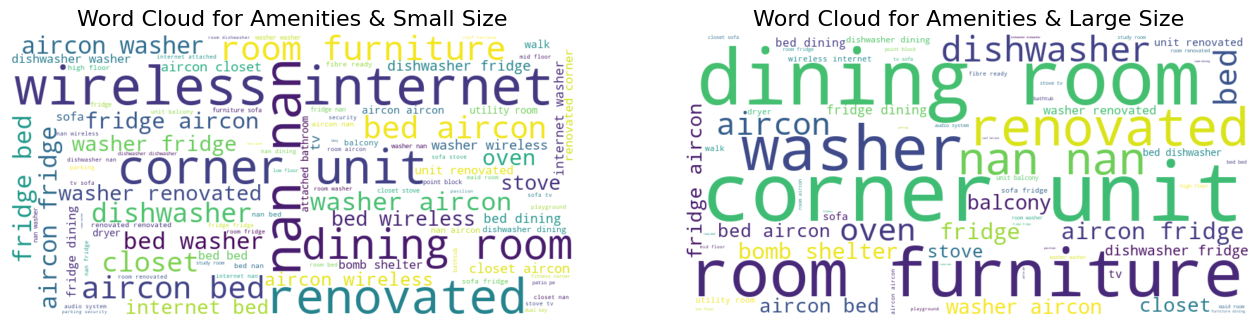

In [ ]:

small_size_text = ' '.join(small_size['amenities_processed'].dropna())
large_size_text = ' '.join(large_size['amenities_processed'].dropna())


wordcloud_small = WordCloud(width=800, height=400, background_color='white').generate(small_size_text)
wordcloud_large = WordCloud(width=800, height=400, background_color='white').generate(large_size_text)


plt.figure(figsize=(16, 8))

# Word cloud for size < 1000
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_small, interpolation='bilinear')
plt.title('Word Cloud for Amenities & Small Size', fontsize=16)
plt.axis('off')

# Word cloud for size >= 1000
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_large, interpolation='bilinear')
plt.title('Word Cloud for Amenities & Large Size', fontsize=16)
plt.axis('off')

plt.show()

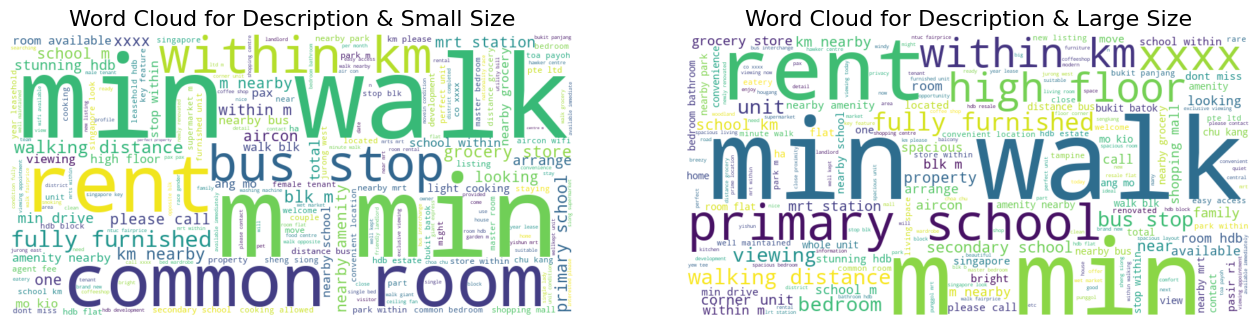

In [ ]:
small_size_text_desc = ' '.join(small_size['description_processed'].dropna())
large_size_text_desc = ' '.join(large_size['description_processed'].dropna())

wordcloud_small_desc = WordCloud(width=800, height=400, background_color='white').generate(small_size_text_desc)
wordcloud_large_desc = WordCloud(width=800, height=400, background_color='white').generate(large_size_text_desc)

plt.figure(figsize=(16, 8))

# Word cloud for size < 1000
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_small_desc, interpolation='bilinear')
plt.title('Word Cloud for Description & Small Size', fontsize=16)
plt.axis('off')

# Word cloud for size >= 1000
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_large_desc, interpolation='bilinear')
plt.title('Word Cloud for Description & Large Size', fontsize=16)
plt.axis('off')

plt.show()

# price_per_sqft Analysis

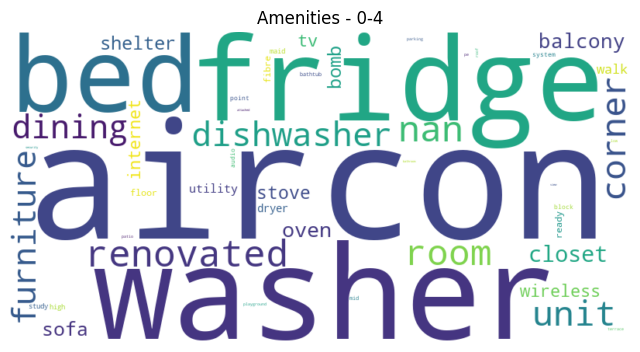

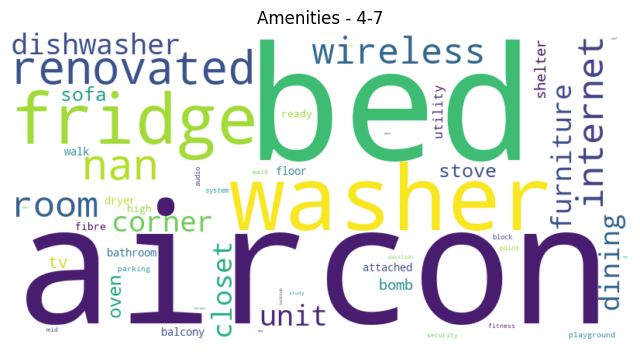

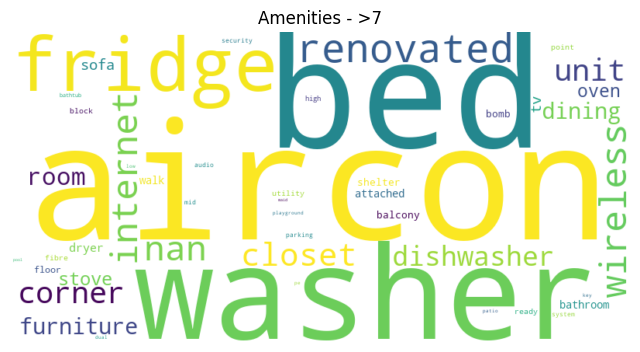

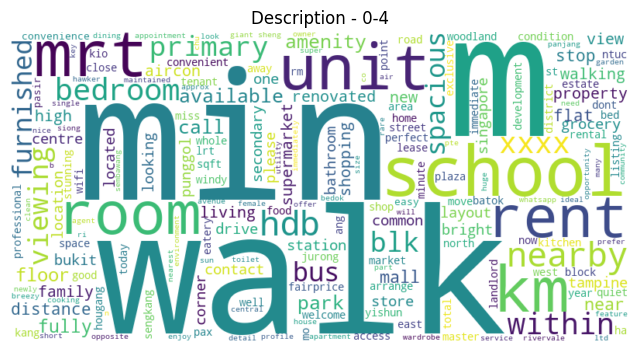

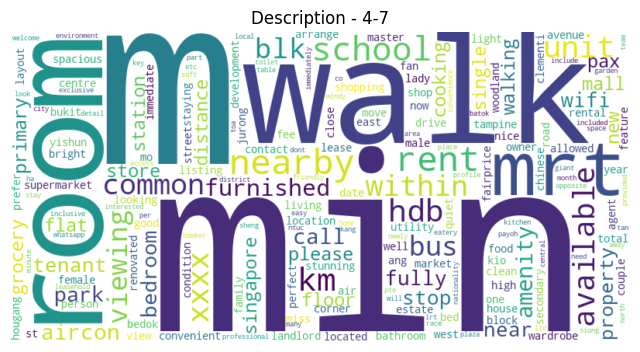

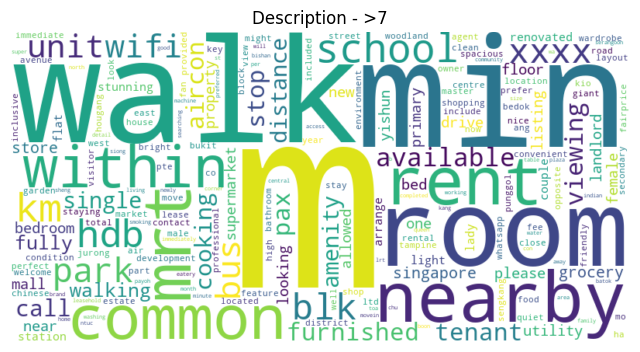

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(' '.join(text))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

#  we classify price_per_sqft into three categories
def classify_price(x):
    if x < 4:
        return '0-4'
    elif 4 <= x <= 7:
        return '4-7'
    else:
        return '>7'

df['price_category'] = df['price_per_sqft'].apply(classify_price)

categories = ['0-4', '4-7', '>7']

for category in categories:
    df_filtered = df[df['price_category'] == category]
    plot_wordcloud(df_filtered['amenities_processed'].dropna(), f'Amenities - {category}')

for category in categories:
    df_filtered = df[df['price_category'] == category]
    plot_wordcloud(df_filtered['description_processed'].dropna(), f'Description - {category}')

# floor_level Analysis

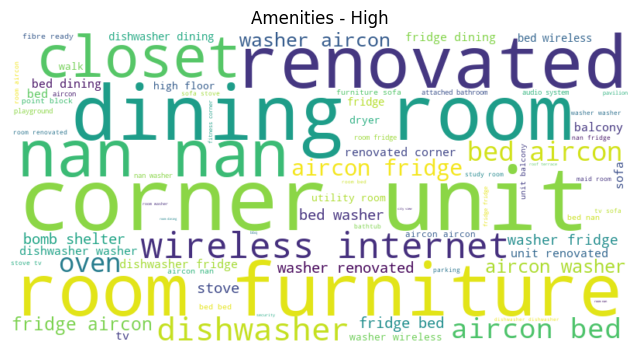

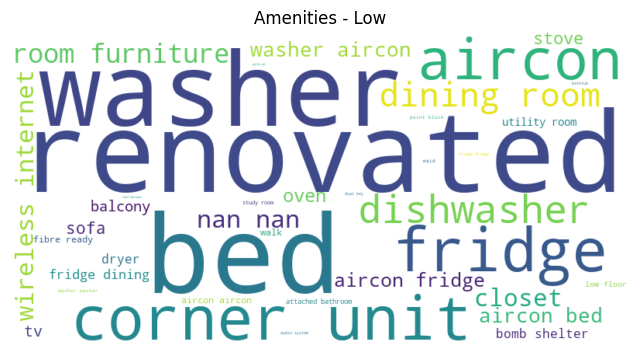

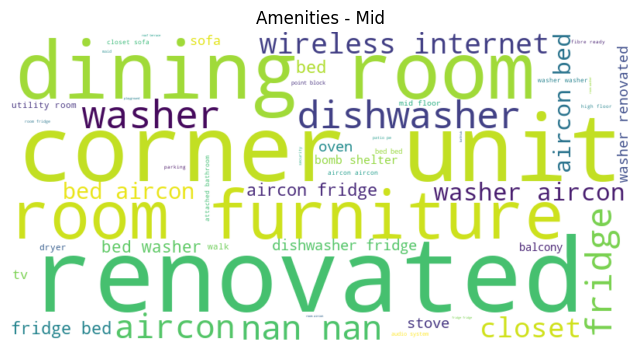

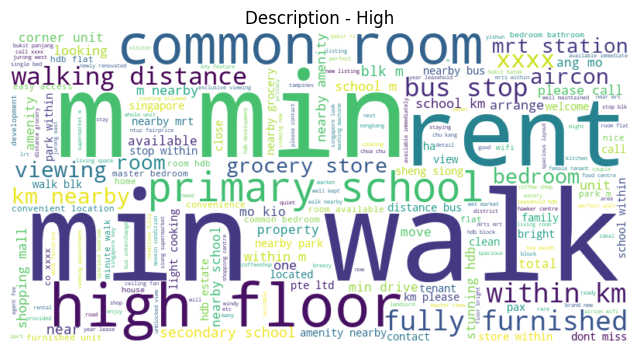

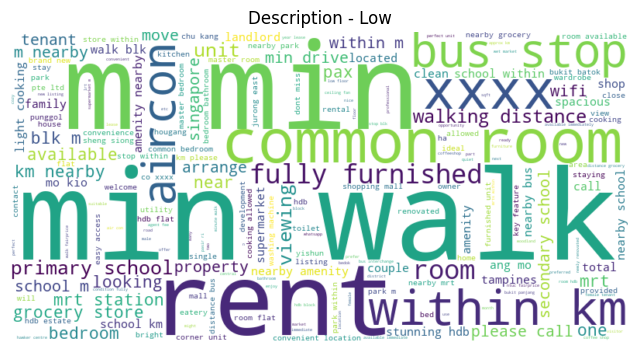

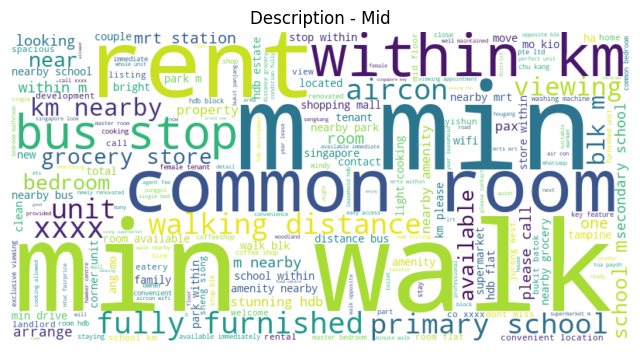

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

categories = ['High', 'Low', 'Mid']

for category in categories:
    df_category = df[df['floor_level'] == category]
    plot_wordcloud(df_category['amenities_processed'].dropna(), f'Amenities - {category}')

for category in categories:
    df_category = df[df['floor_level'] == category]
    plot_wordcloud(df_category['description_processed'].dropna(), f'Description - {category}')

# furnishing Analysis

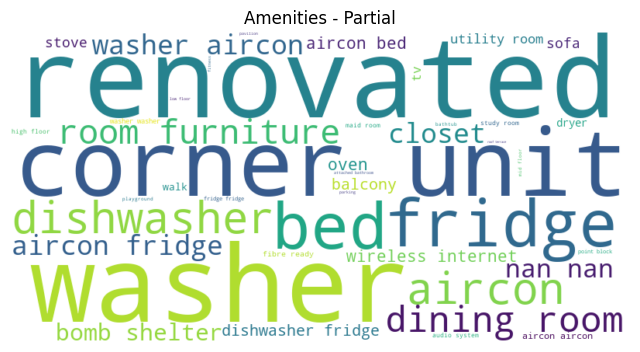

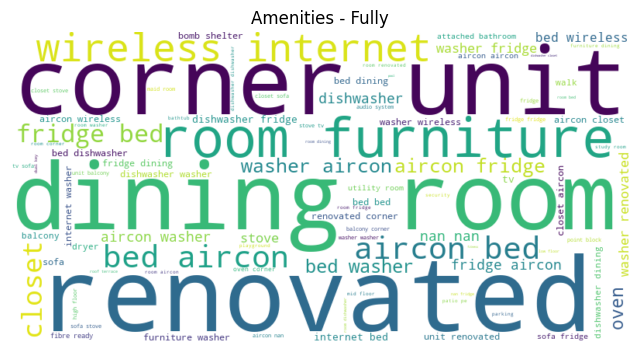

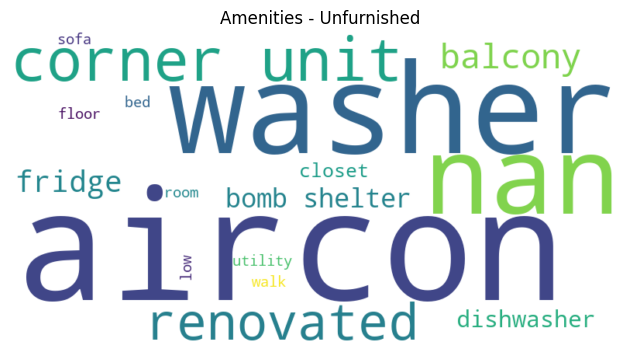

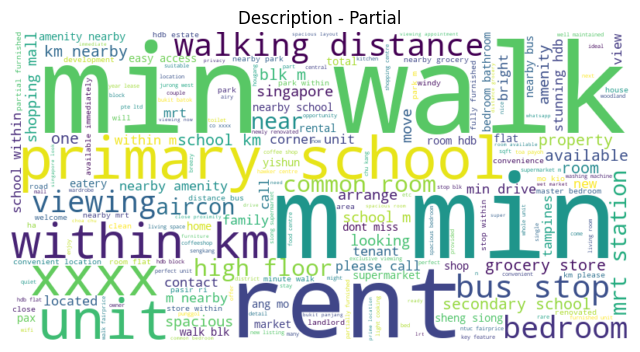

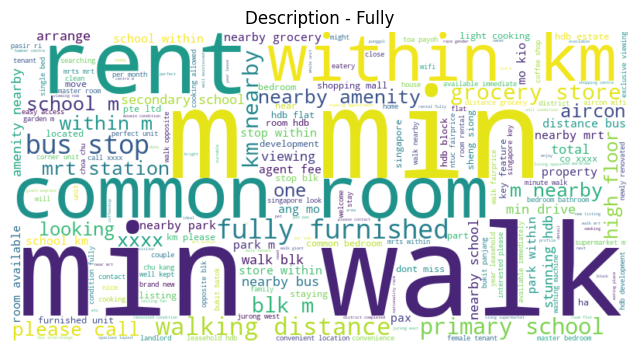

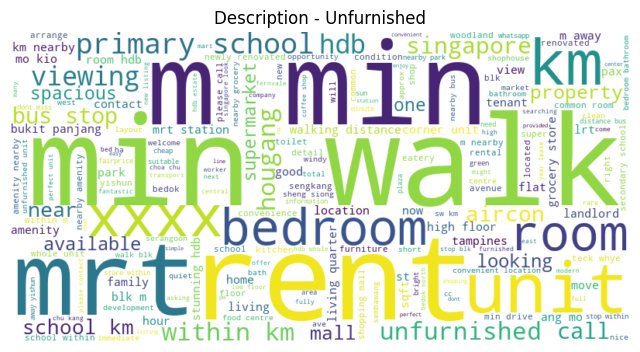

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

categories = ['Partial', 'Fully', 'Unfurnished']

for category in categories:
    df_filtered = df[df['furnishing'] == category]
    plot_wordcloud(df_filtered['amenities_processed'].dropna(), f'Amenities - {category}')

for category in categories:
    df_filtered = df[df['furnishing'] == category]
    plot_wordcloud(df_filtered['description_processed'].dropna(), f'Description - {category}')

# Unigram in Amenties and Descrptions

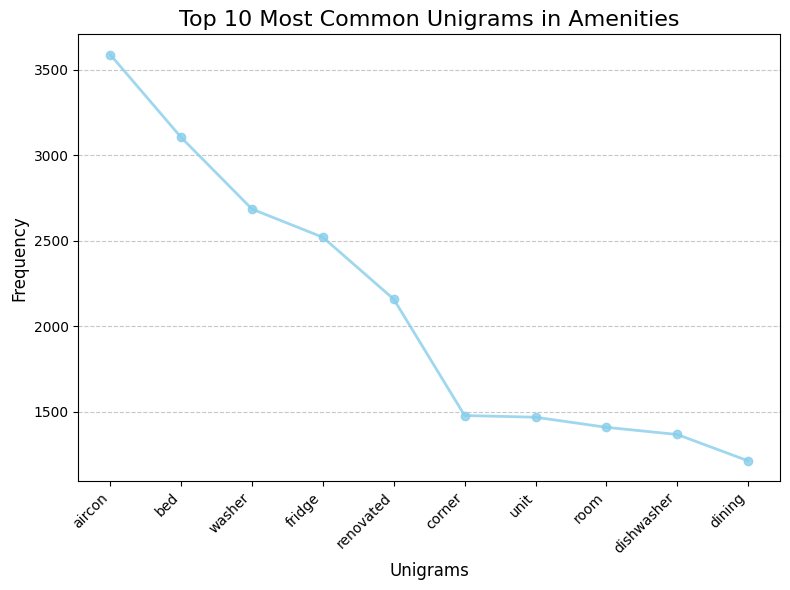

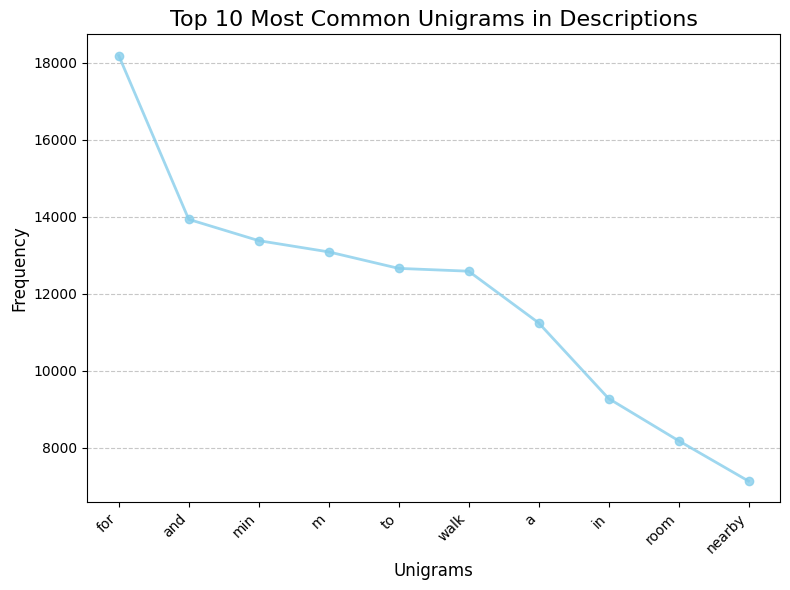

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

def plot_unigrams_line_chart(text_column, title):
    text = " ".join(str(amenity) for amenity in text_column.dropna() if amenity != 'nan')
    
    tokens = word_tokenize(text.lower())
    
    unigram_counts = Counter(tokens)
    
    most_common_unigrams = unigram_counts.most_common(10)
    
    unigram_labels = [word for word, count in most_common_unigrams]
    unigram_values = [count for word, count in most_common_unigrams]
    
    plt.figure(figsize=(8, 6))
    plt.plot(unigram_labels, unigram_values, marker='o', color='skyblue', linestyle='-', linewidth=2, alpha=0.8)
    plt.title(f"Top 10 Most Common Unigrams in {title}", fontsize=16)
    plt.xlabel("Unigrams", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_unigrams_line_chart(df['amenities_processed'], "Amenities")
plot_unigrams_line_chart(df['description_processed'], "Descriptions")

# Bigrams in Amenities and Description.

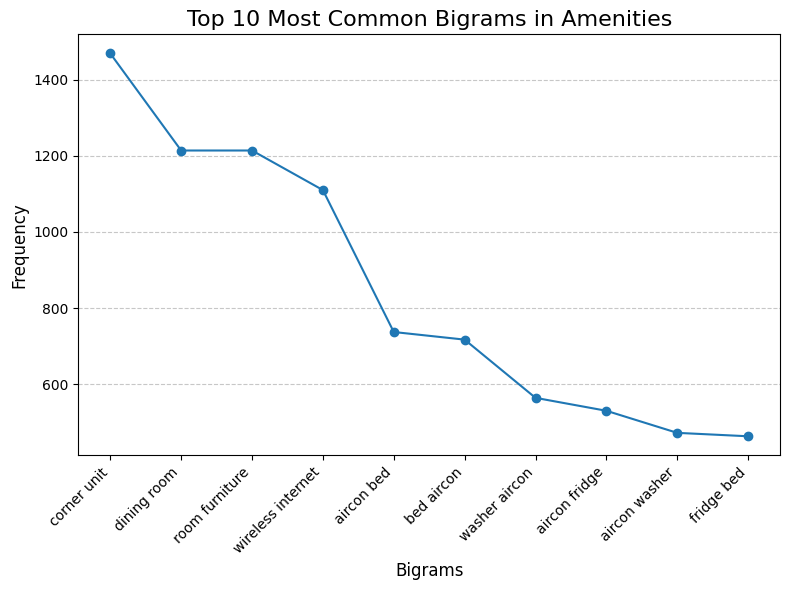

In [ ]:
# Combine all text in the 'amenities_processed' column, we drop the NaN values
text = " ".join(str(amenity) for amenity in df['amenities_processed'].dropna() if amenity != 'nan')

tokens = word_tokenize(text.lower())
bigram_list = list(bigrams(tokens))

bigram_counts = Counter(bigram_list)

most_common_bigrams = bigram_counts.most_common(10)

bigrams_labels = [f"{a} {b}" for (a, b), count in most_common_bigrams]
bigrams_values = [count for (a, b), count in most_common_bigrams]

plt.figure(figsize=(8, 6))
plt.plot(bigrams_labels, bigrams_values, marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Common Bigrams in Amenities", fontsize=16)
plt.xlabel("Bigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

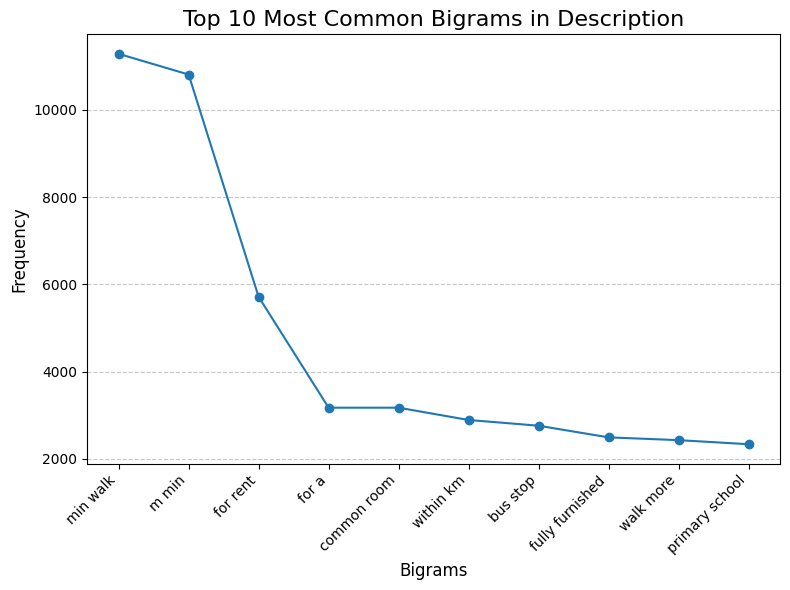

In [ ]:
text_desc = " ".join(str(desc) for desc in df['description_processed'].dropna() if desc != 'nan')

tokens_desc = word_tokenize(text_desc.lower())
bigram_list_desc = list(bigrams(tokens_desc))

bigram_counts_desc = Counter(bigram_list_desc)

most_common_bigrams_desc = bigram_counts_desc.most_common(10)

bigrams_labels_desc = [f"{a} {b}" for (a, b), count in most_common_bigrams_desc]
bigrams_values_desc = [count for (a, b), count in most_common_bigrams_desc]

plt.figure(figsize=(8, 6))
plt.plot(bigrams_labels_desc, bigrams_values_desc, marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Common Bigrams in Description", fontsize=16)
plt.xlabel("Bigrams", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Trigrams in Amenities and descriptions.

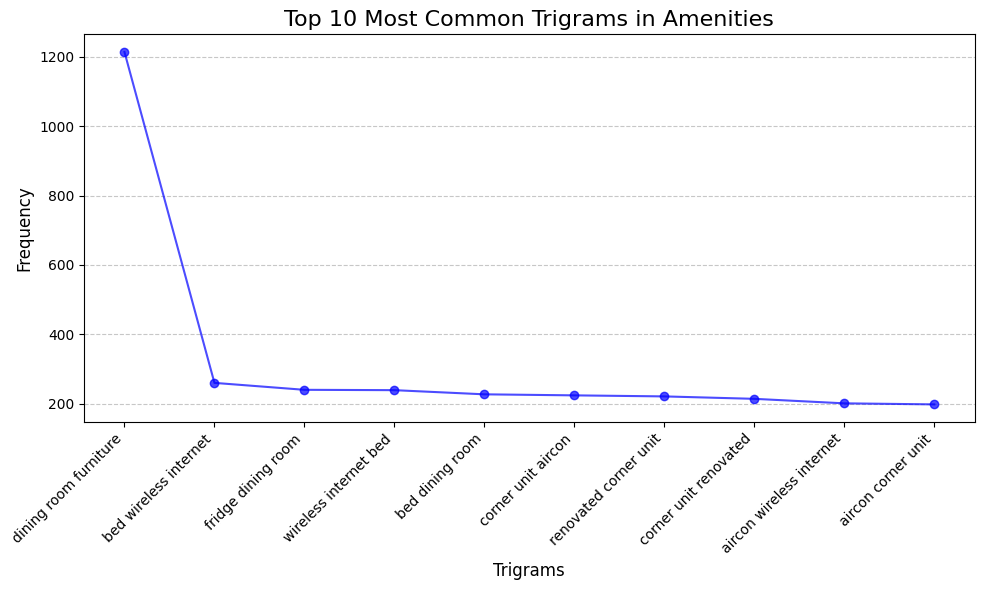

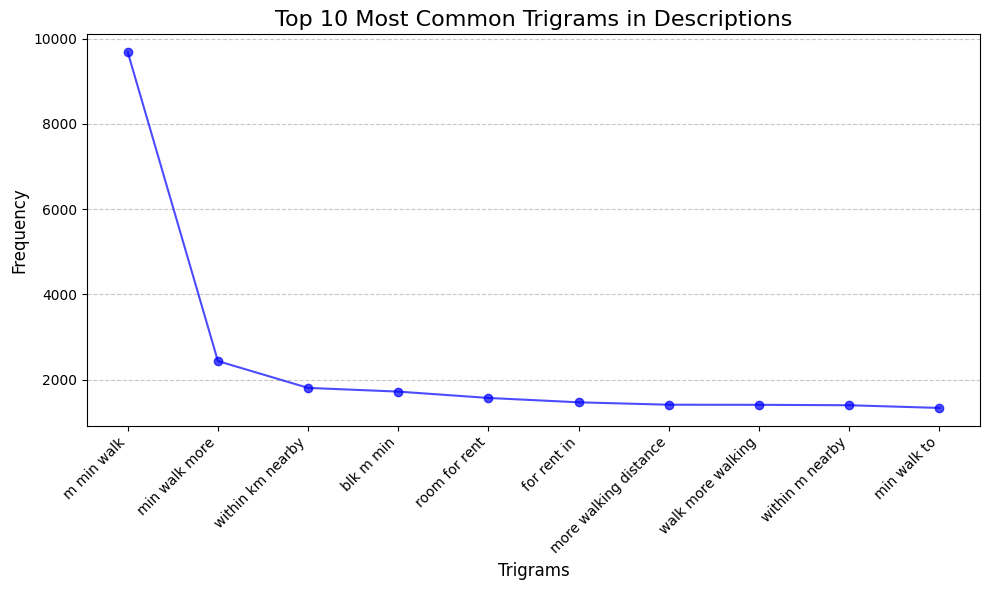

In [ ]:
from nltk import trigrams
from collections import Counter
import matplotlib.pyplot as plt

def plot_trigrams_line_chart(text_column, title):
    text = " ".join(str(item) for item in text_column.dropna() if item != 'nan')
    
    tokens = word_tokenize(text.lower())
    
    trigram_list = list(trigrams(tokens))
    
    trigram_counts = Counter(trigram_list)
    
    most_common_trigrams = trigram_counts.most_common(10)
    
    trigram_labels = [f"{a} {b} {c}" for (a, b, c), count in most_common_trigrams]
    trigram_values = [count for (a, b, c), count in most_common_trigrams]
    
    plt.figure(figsize=(10, 6))
    plt.plot(trigram_labels, trigram_values, marker='o', linestyle='-', color='blue', alpha=0.7)
    plt.title(f"Top 10 Most Common Trigrams in {title}", fontsize=16)
    plt.xlabel("Trigrams", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_trigrams_line_chart(df['amenities_processed'], "Amenities")
plot_trigrams_line_chart(df['description_processed'], "Descriptions")

# Topic Modelling

In [ ]:
#For Amenities.
tokenized_amenities = [
    str(amenity).split()
    for amenity in df['amenities_processed'].dropna()
    if str(amenity).lower() != 'nan'
]

dictionary = corpora.Dictionary(tokenized_amenities)
corpus = [dictionary.doc2bow(text) for text in tokenized_amenities]

In [ ]:
num_topics = 3

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha='auto'
)

print("LDA Topics for Amenities:")
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

LDA Topics for Amenities:
Topic 1: 0.148*"aircon" + 0.134*"bed" + 0.113*"washer" + 0.101*"fridge" + 0.075*"renovated" + 0.058*"dishwasher" + 0.056*"internet" + 0.056*"wireless" + 0.050*"room" + 0.044*"dining"
Topic 2: 0.368*"corner" + 0.366*"unit" + 0.079*"renovated" + 0.053*"balcony" + 0.014*"room" + 0.010*"aircon" + 0.009*"dishwasher" + 0.009*"washer" + 0.008*"furniture" + 0.008*"dining"
Topic 3: 0.137*"shelter" + 0.137*"bomb" + 0.131*"attached" + 0.131*"bathroom" + 0.099*"closet" + 0.097*"in" + 0.097*"walk" + 0.024*"balcony" + 0.023*"system" + 0.023*"audio"


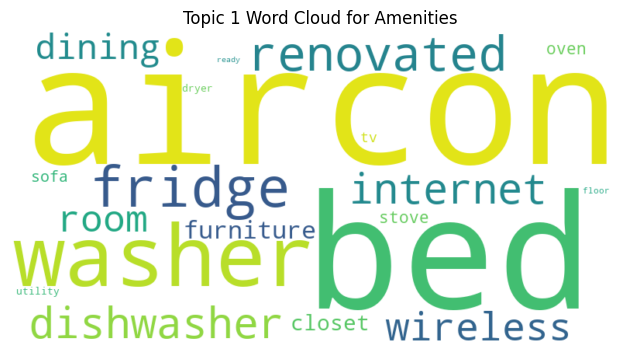

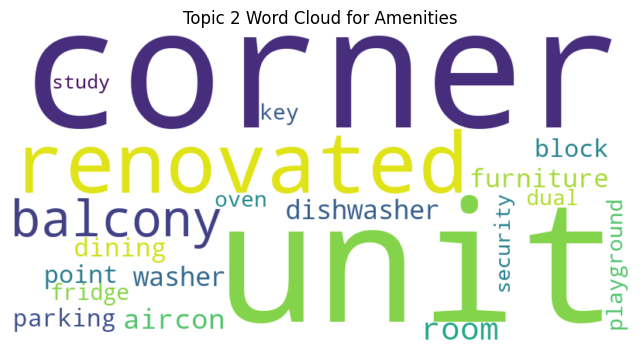

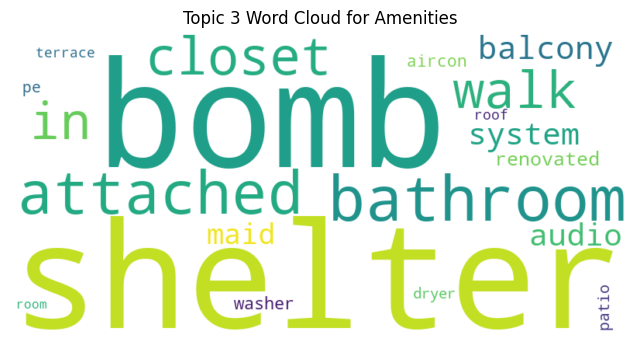

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for i in range(num_topics):
    plt.figure(figsize=(8, 6))
    plt.title(f"Topic {i + 1} Word Cloud for Amenities")

    topic_words = dict(lda_model.show_topic(i, 20))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
# For Description part.
tokenized_descriptions = [
    str(description).split()
    for description in df['description_processed'].dropna()
    if str(description).lower() != 'nan'
]

dictionary_desc = corpora.Dictionary(tokenized_descriptions)
corpus_desc = [dictionary_desc.doc2bow(text) for text in tokenized_descriptions]

In [ ]:
num_topics_desc = 2

lda_model_desc = gensim.models.LdaModel(
    corpus=corpus_desc,
    id2word=dictionary_desc,
    num_topics=num_topics_desc,
    random_state=42,
    passes=10,
    alpha='auto'
)

print("LDA Topics for Description:")
for idx, topic in lda_model_desc.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

LDA Topics for Description:
Topic 1: 0.055*"m" + 0.049*"min" + 0.045*"walk" + 0.027*"a" + 0.026*"km" + 0.026*"for" + 0.025*"nearby" + 0.025*"school" + 0.024*"in" + 0.020*"within"
Topic 2: 0.030*"for" + 0.029*"and" + 0.026*"to" + 0.019*"room" + 0.014*"with" + 0.013*"mrt" + 0.012*"rent" + 0.011*"a" + 0.010*"no" + 0.010*"common"


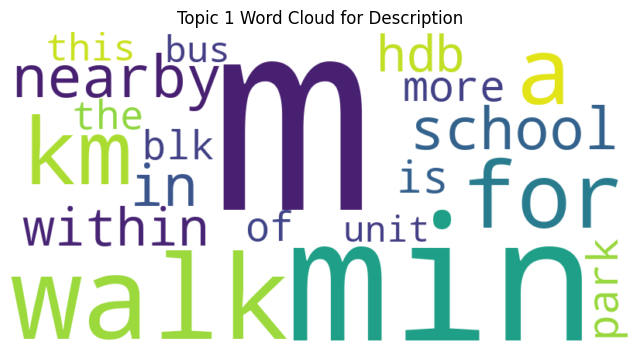

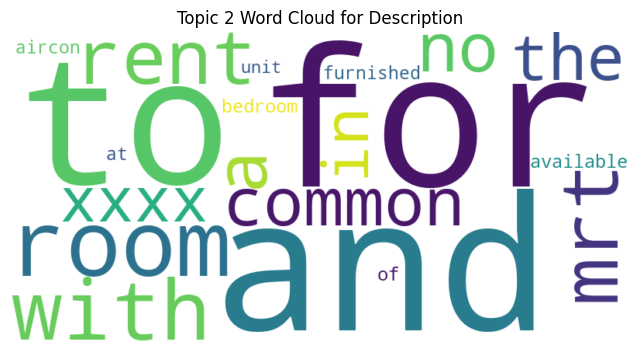

In [ ]:
for i in range(num_topics_desc):
    plt.figure(figsize=(8, 6))
    plt.title(f"Topic {i + 1} Word Cloud for Description")

    topic_words_desc = dict(lda_model_desc.show_topic(i, 20))

    wordcloud_desc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words_desc)
    plt.imshow(wordcloud_desc, interpolation='bilinear')
    plt.axis('off')
    plt.show()